In [3]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from pandas_profiling import ProfileReport

In [4]:
df = pd.read_csv('winequality_red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [9]:
#profile = ProfileReport(df)
#profile

In [11]:
x = df.drop(columns='quality')
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [12]:
y = df.quality
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=30)

In [15]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1178,5.6,0.915,0.00,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.4
1189,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.99616,3.30,0.44,9.6
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3
...,...,...,...,...,...,...,...,...,...,...,...
919,8.4,0.620,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8
1164,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
500,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0
941,9.9,0.270,0.49,5.0,0.082,9.0,17.0,0.99484,3.19,0.52,12.5


In [16]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1147,10.0,0.410,0.45,6.20,0.071,6.0,14.0,0.99702,3.21,0.49,11.8
659,7.1,0.840,0.02,4.40,0.096,5.0,13.0,0.99700,3.41,0.57,11.0
871,6.9,0.560,0.03,1.50,0.086,36.0,46.0,0.99522,3.53,0.57,10.6
1333,9.1,0.775,0.22,2.20,0.079,12.0,48.0,0.99760,3.18,0.51,9.6
1411,6.4,0.470,0.40,2.40,0.071,8.0,19.0,0.99630,3.56,0.73,10.6
...,...,...,...,...,...,...,...,...,...,...,...
721,8.9,0.480,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2
490,9.3,0.775,0.27,2.80,0.078,24.0,56.0,0.99840,3.31,0.67,10.6
575,12.3,0.270,0.49,3.10,0.079,28.0,46.0,0.99930,3.20,0.80,10.2
1051,8.5,0.460,0.59,1.40,0.414,16.0,45.0,0.99702,3.03,1.34,9.2


In [17]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
import sklearn
import matplotlib.pyplot as plt 
from sklearn import tree 
%matplotlib inline

[Text(0.5499699778713298, 0.9722222222222222, 'X[10] <= 10.35\ngini = 0.642\nsamples = 1199\nvalue = [8, 35, 512, 477, 153, 14]'),
 Text(0.3245661971070812, 0.9166666666666666, 'X[6] <= 95.5\ngini = 0.528\nsamples = 666\nvalue = [6, 20, 406, 209, 23, 2]'),
 Text(0.20526365500863558, 0.8611111111111112, 'X[9] <= 0.585\ngini = 0.554\nsamples = 584\nvalue = [6, 19, 332, 202, 23, 2]'),
 Text(0.080661701208981, 0.8055555555555556, 'X[6] <= 90.5\ngini = 0.468\nsamples = 261\nvalue = [3, 14, 179, 63, 2, 0]'),
 Text(0.0560772884283247, 0.75, 'X[10] <= 9.075\ngini = 0.453\nsamples = 250\nvalue = [3, 14, 176, 55, 2, 0]'),
 Text(0.017271157167530225, 0.6944444444444444, 'X[6] <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]'),
 Text(0.0069084628670120895, 0.6388888888888888, 'X[8] <= 3.38\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.0034542314335060447, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6, 0, 0]'),
 Text(0.010362694300518135, 0.583

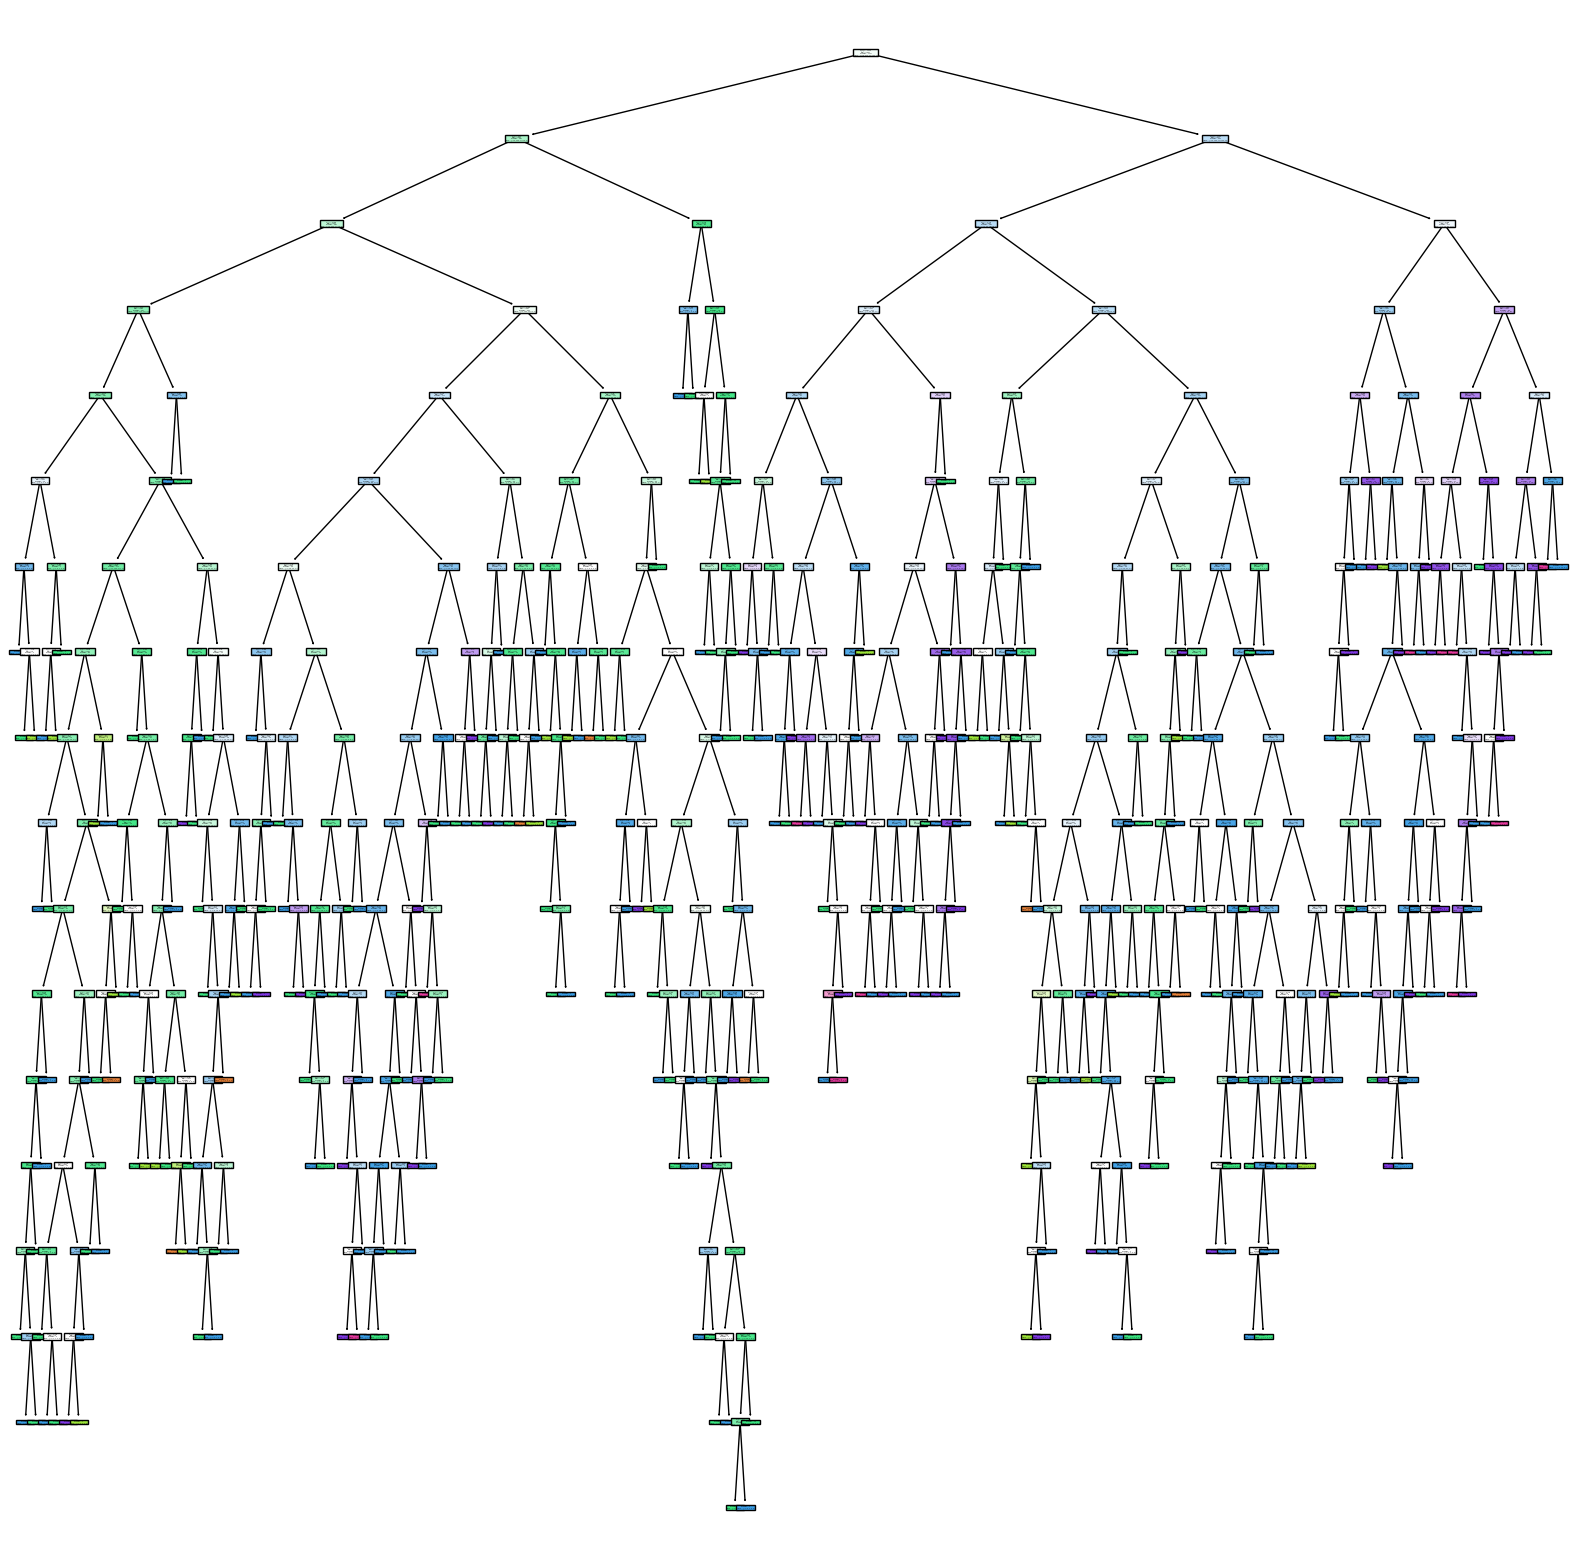

In [22]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)

In [204]:
df1 = df.head(40)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [205]:
x1 = df1.drop(columns='quality')
y1 = df1.quality

In [206]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

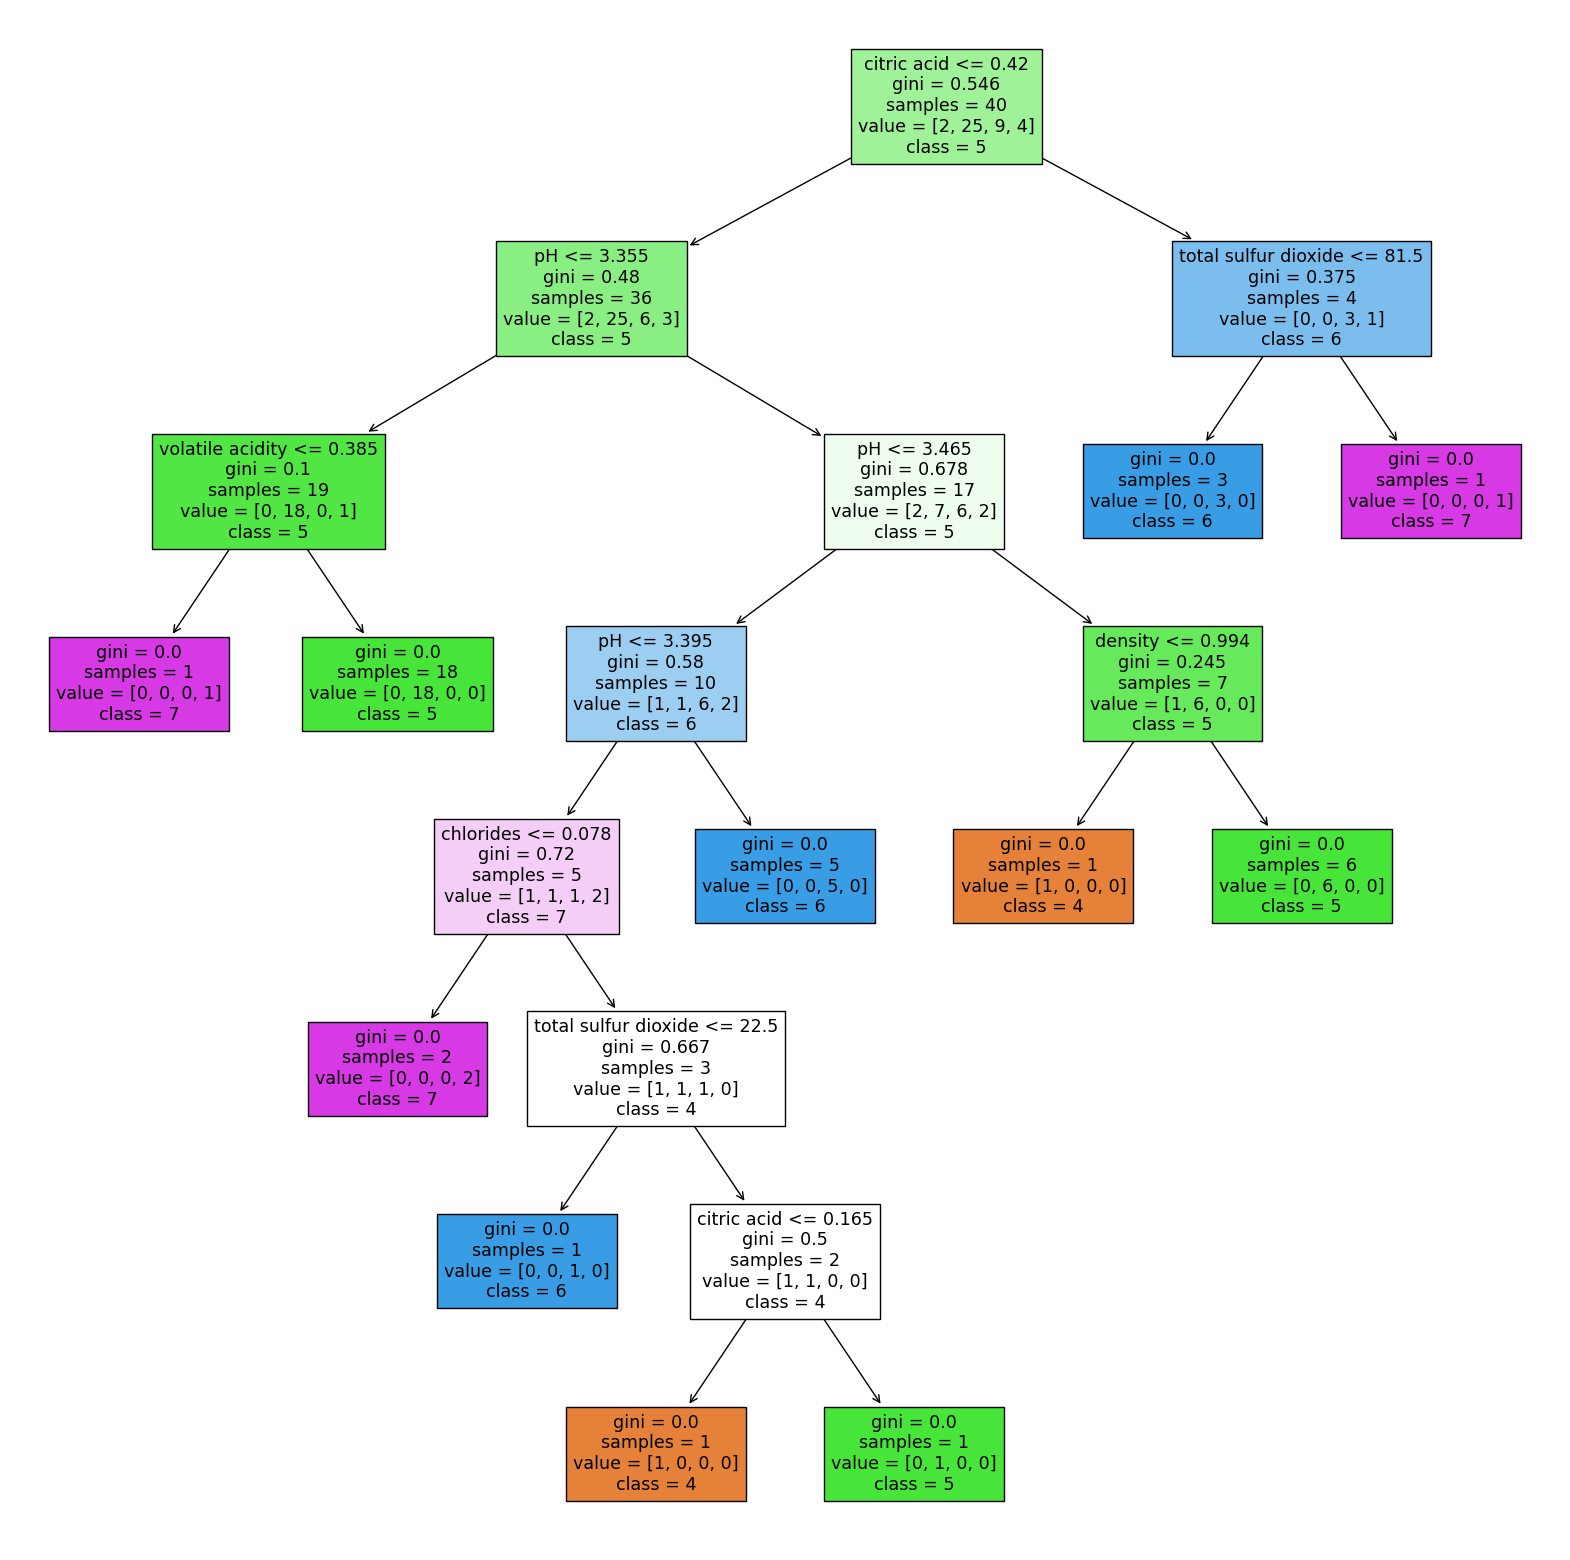

In [207]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1,filled=True,class_names=[str(i) for i in set(y1)] ,feature_names=x1.columns)
plt.savefig('dt_model_wine_red')

In [208]:
set(y1)

{4, 5, 6, 7}

In [209]:
x1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [210]:
dt_model1.predict(x1)

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5], dtype=int64)

In [211]:
dt_model1.score(x1,y1)

1.0

In [212]:
dt_model1.score(x_test,y_test)

0.45

In [213]:
dt_model1.cost_complexity_pruning_path(x1,y1)

{'ccp_alphas': array([0.        , 0.025     , 0.0375    , 0.04      , 0.04285714,
        0.04736842, 0.055     , 0.09117481]),
 'impurities': array([0.        , 0.05      , 0.0875    , 0.1275    , 0.17035714,
        0.21772556, 0.27272556, 0.54625   ])}

In [214]:
path = dt_model1.cost_complexity_pruning_path(x1,y1)
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.        , 0.025     , 0.0375    , 0.04      , 0.04285714,
       0.04736842, 0.055     , 0.09117481])

Text(0, 0.5, 'score')

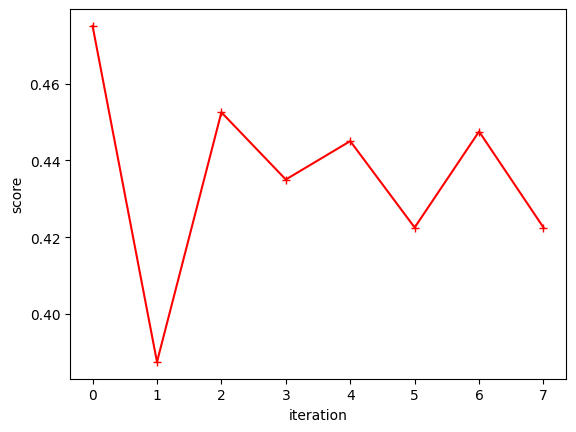

In [215]:
dt_model2 = []
score = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m)
    score.append(dt_m.score(x_test, y_test))

plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [216]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.025),
 DecisionTreeClassifier(ccp_alpha=0.0375),
 DecisionTreeClassifier(ccp_alpha=0.039999999999999994),
 DecisionTreeClassifier(ccp_alpha=0.042857142857142864),
 DecisionTreeClassifier(ccp_alpha=0.0473684210526316),
 DecisionTreeClassifier(ccp_alpha=0.05500000000000002),
 DecisionTreeClassifier(ccp_alpha=0.09117481203007516)]

In [217]:
train_score = [i.score(x1,y1) for i in dt_model2]
test_score = [i.score(x_test,y_test) for i in dt_model2]

In [218]:
train_score

[1.0, 0.95, 0.925, 0.9, 0.875, 0.85, 0.825, 0.625]

In [219]:
test_score

[0.475, 0.3875, 0.4525, 0.435, 0.445, 0.4225, 0.4475, 0.4225]

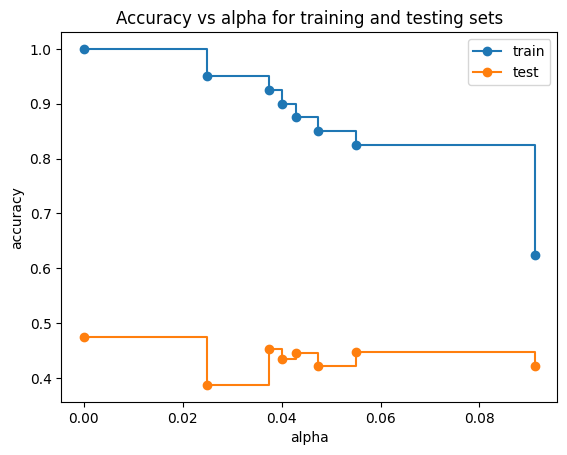

In [220]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [221]:
dt_model_ccp = DecisionTreeClassifier(random_state=0,ccp_alpha=0.14)
dt_model_ccp.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.14, random_state=0)

[Text(0.5, 0.5, 'gini = 0.546\nsamples = 40\nvalue = [2, 25, 9, 4]')]

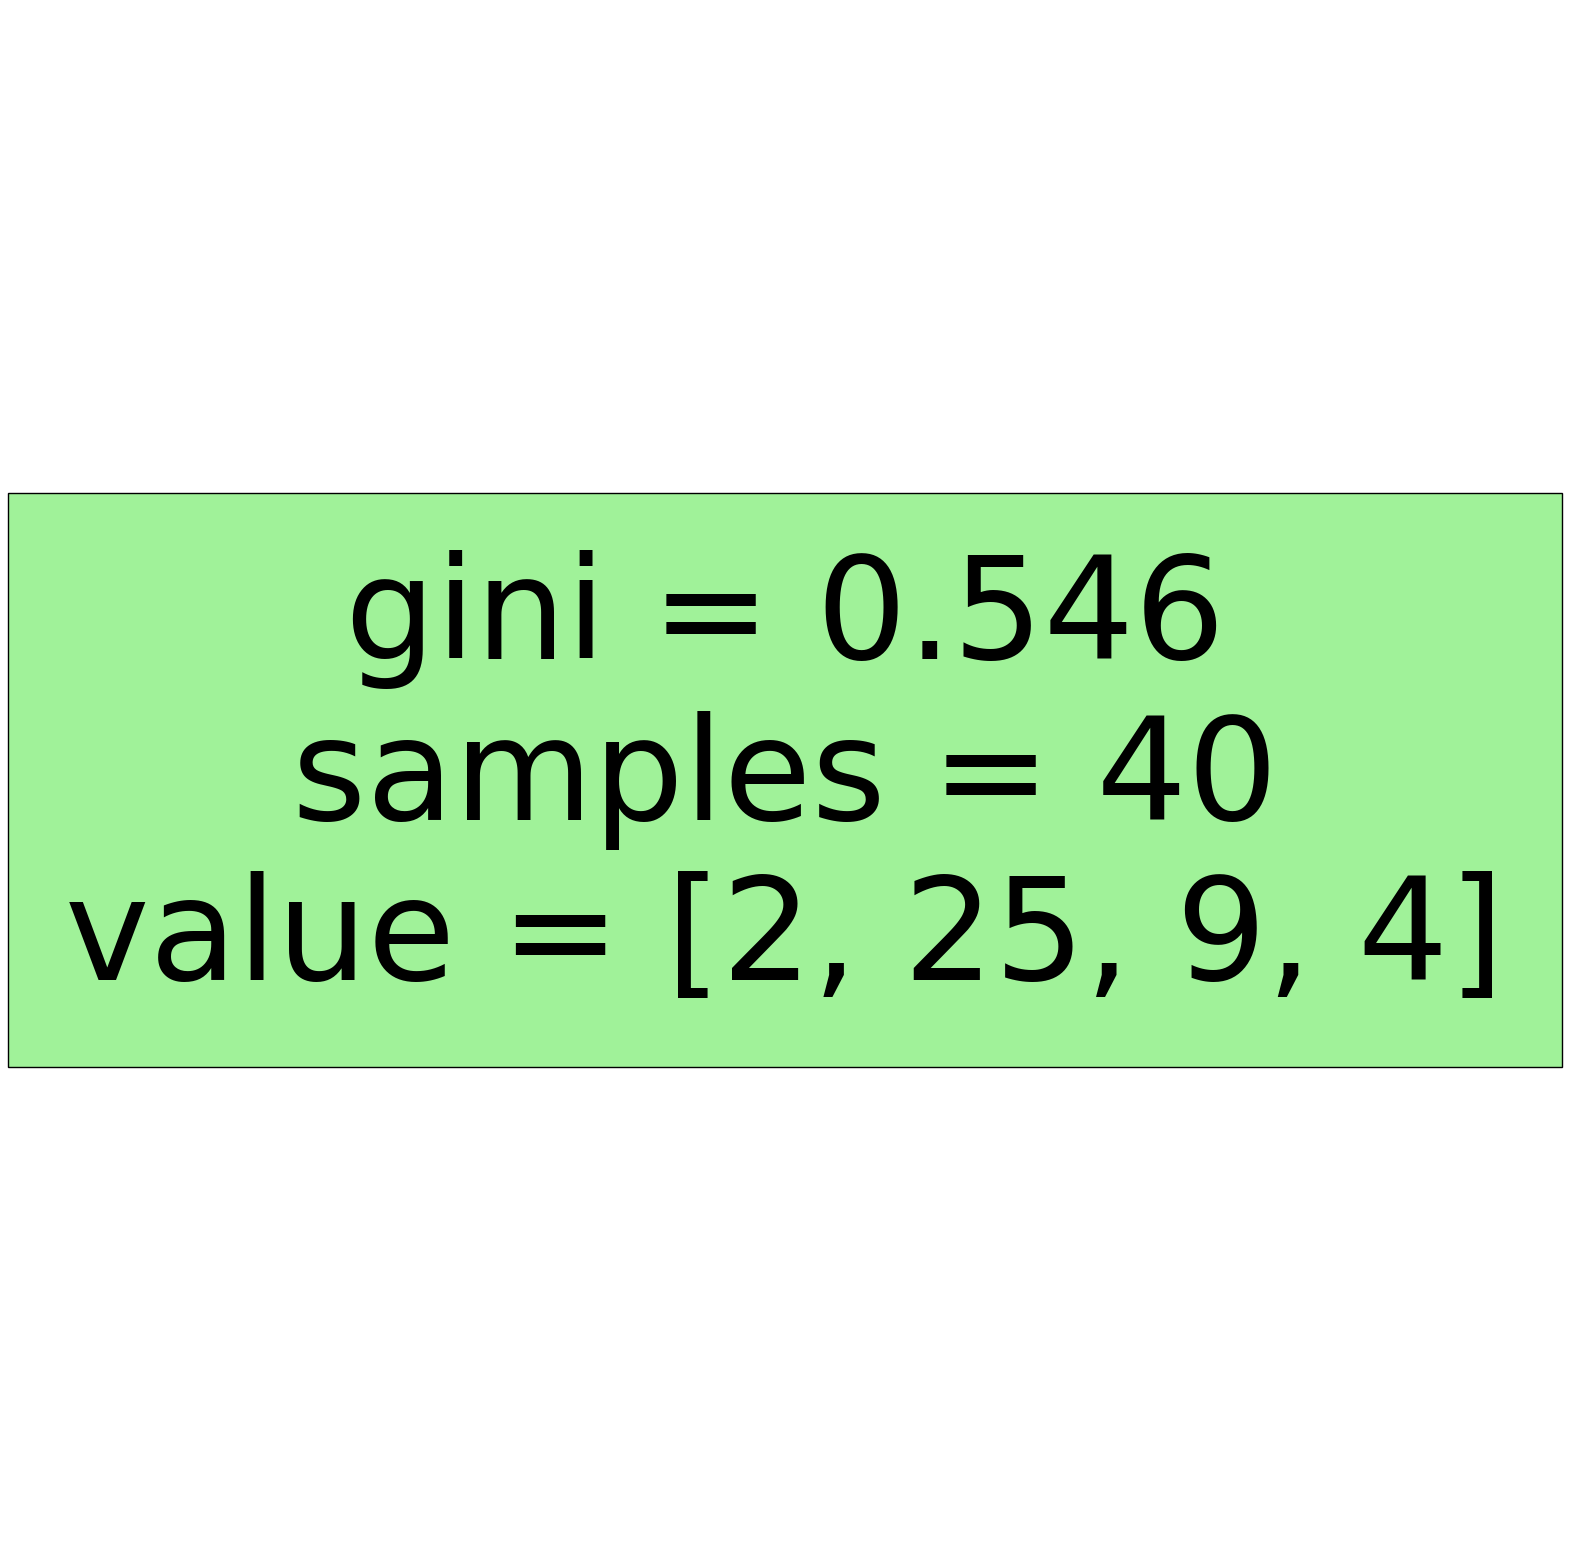

In [222]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [223]:
dt_model_ccp.score(x1,y1)

0.625

In [224]:
dt_model_ccp.score(x_test,y_test)

0.4225

In [253]:
grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,40,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1),
             'ccp_alpha':np.random.rand(20)
            }

In [248]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram , cv = 10 , n_jobs=-1)

In [250]:
#grid_ccp.fit(x1,y1)

In [251]:
#grid_ccp.best_params_

In [240]:
dt_cpp_new = DecisionTreeClassifier(criterion='entropy' , max_depth=17 ,min_samples_leaf=1 , min_samples_split=3 , splitter='random',ccp_alpha=0.014)

In [241]:
dt_cpp_new.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, criterion='entropy', max_depth=17,
                       min_samples_split=3, splitter='random')

In [242]:
dt_cpp_new.score(x1,y1)

0.975

In [243]:
dt_cpp_new.score(x_test,y_test)

0.3975

In [244]:
pred = dt_cpp_new.predict(x_train)

In [245]:
confusion_matrix(y_train,pred)

array([[  0,   0,   4,   2,   2,   0],
       [  0,   4,  18,   6,   7,   0],
       [  0,  47, 300,  96,  69,   0],
       [  0,  15, 264,  84, 114,   0],
       [  0,   1,  56,  25,  71,   0],
       [  0,   0,   2,   1,  11,   0]], dtype=int64)